# **InceptionV3**

In [ ]:
!pip install ipython-autotime
get_ipython().run_line_magic('load_ext', 'autotime')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 12.8 MB/s 
time: 546 µs (started: 2022-12-04 00:23:30 +00:00)


# Data Aquisition: DiBAS Dataset

In [ ]:
!git clone https://github.com/YuandiWu/DiBAS-Images.git

Cloning into 'DiBAS-Images'...
remote: Enumerating objects: 803, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 803 (delta 8), reused 177 (delta 0), pack-reused 584
Receiving objects: 100% (803/803), 4.15 GiB | 20.80 MiB/s, done.
Resolving deltas: 100% (33/33), done.
Checking out files: 100% (690/690), done.
time: 5min 23s (started: 2022-12-04 00:23:30 +00:00)


In [ ]:
!ls DiBAS-Images/train

Acinetobacter.baumanii	   Lactobacillus.plantarum
Actinomyces.israeli	   Lactobacillus.reuteri
Bacteroides.fragilis	   Lactobacillus.rhamnosus
Bifidobacterium.spp	   Lactobacillus.salivarius
Candida.albicans	   Listeria.monocytogenes
Clostridium.perfringens    Micrococcus.spp
Enterococcus.faecalis	   Neisseria.gonorrhoeae
Enterococcus.faecium	   Porfyromonas.gingivalis
Escherichia.coli	   Propionibacterium.acnes
Fusobacterium		   Proteus
Lactobacillus.casei	   Pseudomonas.aeruginosa
Lactobacillus.crispatus    Staphylococcus.aureus
Lactobacillus.delbrueckii  Staphylococcus.epidermidis
Lactobacillus.gasseri	   Staphylococcus.saprophiticus
Lactobacillus.jehnsenii    Streptococcus.agalactiae
Lactobacillus.johnsonii    Veionella
Lactobacillus.paracasei
time: 134 ms (started: 2022-12-04 00:28:53 +00:00)


# Library Imports

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import random

time: 3.86 s (started: 2022-12-04 00:28:53 +00:00)


# Data Pre-processsing and augmentation

In [ ]:
original_transform = transforms.Compose([transforms.Resize((299,299)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
original = datasets.ImageFolder("DiBAS-Images/train", transform=original_transform)

time: 12 ms (started: 2022-12-04 00:28:57 +00:00)


In [ ]:
transform1 = transforms.Compose([transforms.Resize((299,299)),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment1 = datasets.ImageFolder("DiBAS-Images/train", transform=transform1)

time: 6.71 ms (started: 2022-12-04 00:28:57 +00:00)


In [ ]:
transform2 = transforms.Compose([transforms.Resize((299,299)),
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment2 = datasets.ImageFolder("DiBAS-Images/train", transform=transform2)

time: 14.5 ms (started: 2022-12-04 00:28:57 +00:00)


In [ ]:
transform3 = transforms.Compose([transforms.Resize((299,299)),
                                transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment3 = datasets.ImageFolder("DiBAS-Images/train", transform=transform3)

time: 6.64 ms (started: 2022-12-04 00:28:57 +00:00)


In [ ]:
transform4 = transforms.Compose([transforms.Resize((299,299)),
                                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment4 = datasets.ImageFolder("DiBAS-Images/train", transform=transform4)

time: 9.45 ms (started: 2022-12-04 00:28:57 +00:00)


In [ ]:
transform5 = transforms.Compose([transforms.Resize((299,299)),
                                transforms.RandomAutocontrast(0.5),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment5 = datasets.ImageFolder("DiBAS-Images/train", transform=transform5)

time: 6.62 ms (started: 2022-12-04 00:28:57 +00:00)


In [ ]:
transform6 = transforms.Compose([transforms.Resize((299,299)),
                                transforms.RandomEqualize(0.5),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment6 = datasets.ImageFolder("DiBAS-Images/train", transform=transform6)

time: 10.3 ms (started: 2022-12-04 00:28:57 +00:00)


In [ ]:
transform7 = transforms.Compose([transforms.Resize((299,299)),
                                transforms.RandomInvert(0.5),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment7 = datasets.ImageFolder("DiBAS-Images/train", transform=transform7)

time: 6.6 ms (started: 2022-12-04 00:28:57 +00:00)


In [ ]:
combined_dataset = torch.utils.data.ConcatDataset((original, augment1, augment2, augment3, augment4, augment5, augment6, augment7))

time: 984 µs (started: 2022-12-04 00:28:57 +00:00)


In [1]:
def training_test_split(dataset, test_split=0.2):
    train_index, test_index = train_test_split(list(range(len(dataset))), test_size=test_split)
    training_dataset = torch.utils.data.Subset(dataset, train_index)
    test_dataset = torch.utils.data.Subset(dataset, test_index)
    return training_dataset, test_dataset

time: 1.29 ms (started: 2022-12-04 00:28:58 +00:00)


In [ ]:
def test_validation_split(dataset, test_split=0.5):
    validation_index, test_index = train_test_split(list(range(len(dataset))), test_size=test_split)
    validation_dataset = torch.utils.data.Subset(dataset, validation_index)
    test_dataset = torch.utils.data.Subset(dataset, test_index)
    return validation_dataset, test_dataset

time: 1.85 ms (started: 2022-12-04 00:28:58 +00:00)


In [ ]:
training_dataset, test_dataset = training_test_split(combined_dataset)
validation_dataset, test_dataset = test_validation_split(test_dataset)

time: 21.4 ms (started: 2022-12-04 00:28:58 +00:00)


In [ ]:
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

time: 1.46 ms (started: 2022-12-04 00:28:58 +00:00)


In [ ]:
def convert_to_image(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
  image = image.clip(0, 1)
  return image

time: 2.15 ms (started: 2022-12-04 00:28:58 +00:00)


In [ ]:
classes = ["Acinetobacter.baumanii", "Actinomyces.israeli","Bacteroides.fragilis", "Bifidobacterium.spp",
           "Candida.albicans", "Clostridium.perfringens", "Enterococcus.faecalis", "Enterococcus.faecium",
           "Escherichia.coli", "Fusobacterium", "Lactobacillus.casei", "Lactobacillus.crispatus", "Lactobacillus.delbrueckii",
           "Lactobacillus.gasseri", "Lactobacillus.jehnsenii", "Lactobacillus.johnsonii", "Lactobacillus.paracasei",
           "Lactobacillus.plantarum", "Lactobacillus.reuteri", "Lactobacillus.rhamnosus", "Lactobacillus.salivarius",
           "Listeria.monocytogenes", "Micrococcus.spp", "Neisseria.gonorrhoeae", "Porfyromonas.gingivalis",
           "Propionibacterium.acnes", "Proteus", "Pseudomonas.aeruginosa", "Staphylococcus.aureus", "Staphylococcus.epidermidis",
           "Staphylococcus.saprophiticus", "Streptococcus.agalactiae", "Veionella"]

time: 899 µs (started: 2022-12-04 00:28:58 +00:00)


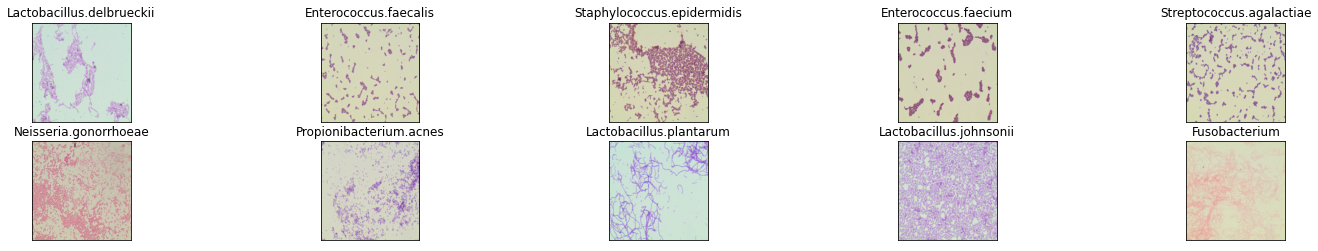

time: 6.92 s (started: 2022-12-04 00:28:58 +00:00)


In [ ]:
original_loader = torch.utils.data.DataLoader(dataset=original, batch_size=64, shuffle=True)
dataset_iterable = iter(original_loader)
images, labels = next(dataset_iterable)
fig = plt.figure(figsize=(25,4))
for i in np.arange(10): #showing sample of 16 images
  ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
  plt.imshow(convert_to_image(images[i]))
  ax.set_title(classes[labels[i].item()])

# Neural Network Construction

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # use gpu for accelerated computation

time: 754 ms (started: 2022-12-04 00:29:05 +00:00)


In [ ]:
model = models.inception_v3(pretrained=True) #pretrained model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

time: 2.43 s (started: 2022-12-04 00:29:05 +00:00)


In [ ]:
model.fc=nn.Sequential(
    nn.Dropout(p=0.6, inplace=False),
    nn.Linear(in_features=2048,out_features=1000),
    nn.Dropout(p=0.6, inplace=False),
    nn.Linear(in_features=1000,out_features=33),
)
model.to(device)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

time: 5.73 s (started: 2022-12-04 00:29:08 +00:00)


In [ ]:
from torchsummary import summary

summary(model, (3, 299, 299))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
       BasicConv2d-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 32, 147, 147]           9,216
       BatchNorm2d-5         [-1, 32, 147, 147]              64
       BasicConv2d-6         [-1, 32, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]          18,432
       BatchNorm2d-8         [-1, 64, 147, 147]             128
       BasicConv2d-9         [-1, 64, 147, 147]               0
        MaxPool2d-10           [-1, 64, 73, 73]               0
           Conv2d-11           [-1, 80, 73, 73]           5,120
      BatchNorm2d-12           [-1, 80, 73, 73]             160
      BasicConv2d-13           [-1, 80, 73, 73]               0
           Conv2d-14          [-1, 192,

# Neural Network Implementation

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

time: 2.01 ms (started: 2022-12-04 00:29:20 +00:00)


In [ ]:
epochs = 20
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

time: 1.37 ms (started: 2022-12-04 00:29:20 +00:00)


In [ ]:
torch.random.manual_seed(42)
for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:

    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs, _ = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    score, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)

        val_outputs, _ = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        val_score, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)

    print("epoch number: {}".format(e+1))
    print("training loss: {:.4f}".format(epoch_loss))
    print("training acc: {:.4f}".format(epoch_acc.item()))
    print("validation loss: {:.4f}".format(val_epoch_loss))
    print("validation acc: {:.4f}".format(val_epoch_acc.item()))

epoch number: 1
training loss: 0.0677
training acc: 0.4699
validation loss: 0.0269
validation acc: 0.8078
epoch number: 2
training loss: 0.0149
training acc: 0.8807
validation loss: 0.0106
validation acc: 0.9229
epoch number: 3
training loss: 0.0077
training acc: 0.9390
validation loss: 0.0080
validation acc: 0.9338
epoch number: 4
training loss: 0.0060
training acc: 0.9499
validation loss: 0.0071
validation acc: 0.9338
epoch number: 5
training loss: 0.0044
training acc: 0.9655
validation loss: 0.0054
validation acc: 0.9501
epoch number: 6
training loss: 0.0033
training acc: 0.9732
validation loss: 0.0032
validation acc: 0.9737
epoch number: 7
training loss: 0.0035
training acc: 0.9721
validation loss: 0.0040
validation acc: 0.9710
epoch number: 8
training loss: 0.0024
training acc: 0.9785
validation loss: 0.0033
validation acc: 0.9764
epoch number: 9
training loss: 0.0021
training acc: 0.9850
validation loss: 0.0031
validation acc: 0.9773
epoch number: 10
training loss: 0.0021
trainin

Plots of loss and accuracy

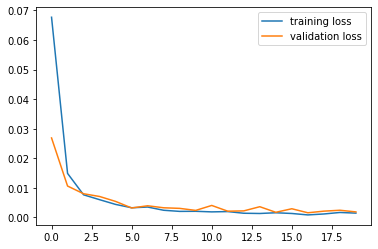

time: 213 ms (started: 2022-12-04 01:39:12 +00:00)


In [ ]:
plt.plot(running_loss_history, label="training loss")
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

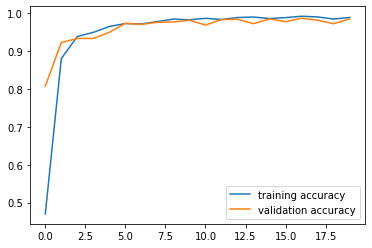

time: 163 ms (started: 2022-12-04 01:39:12 +00:00)


In [ ]:
for i in range(len(running_corrects_history)):
  running_corrects_history[i] = running_corrects_history[i].cpu()

for i in range(len(val_running_corrects_history)):
  val_running_corrects_history[i] = val_running_corrects_history[i].cpu()

plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

Sample of Dataset Classification

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output, _ = model(images)
_, preds = torch.max(output, 1)

time: 919 ms (started: 2022-12-04 01:39:26 +00:00)


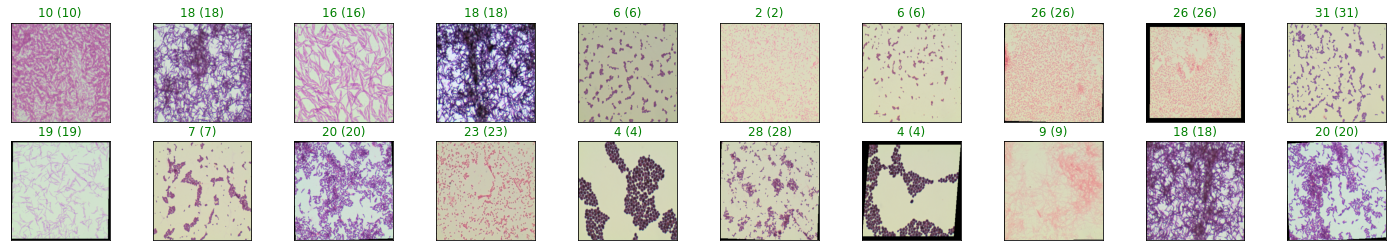

time: 1.31 s (started: 2022-12-04 01:39:29 +00:00)


In [ ]:
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(convert_to_image(images[idx].cpu()))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))

# Confusion Matrix

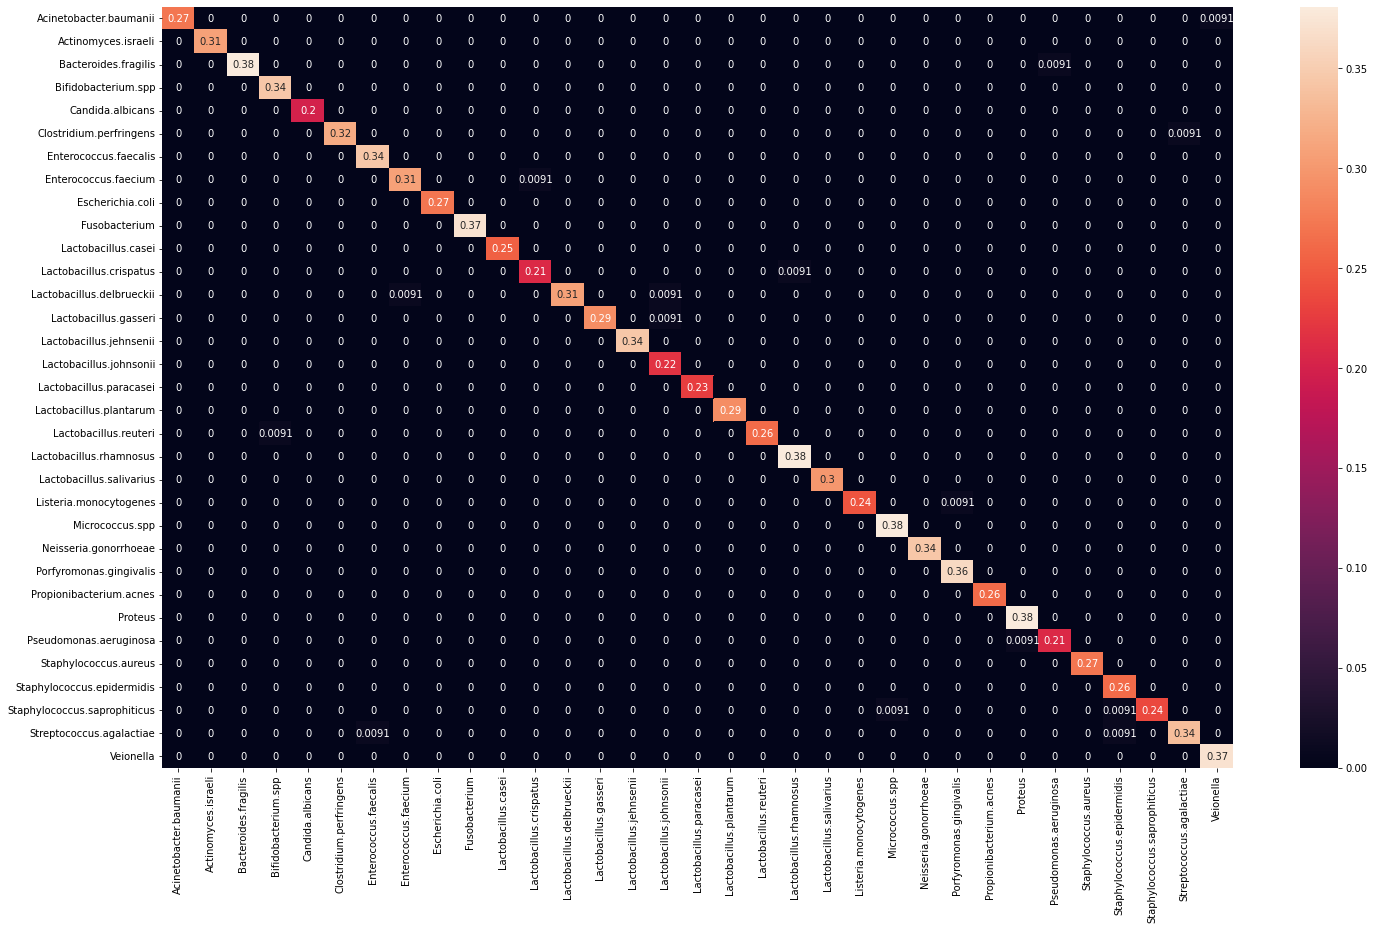

time: 45 s (started: 2022-12-04 01:45:47 +00:00)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

test_running_corrects = 0.0

# iterate over test data
for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        output, _ = model(images)

        test_loss = criterion(output, labels)
        test_score, test_preds = torch.max(output, 1)
        test_running_corrects += torch.sum(test_preds == labels.data)

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output)

        labels = labels.data.cpu().numpy()
        y_true.extend(labels)

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (24,14))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
import sklearn
sklearn.metrics.precision_recall_fscore_support(y_true, y_pred, average = "weighted")

(0.9867867741462298, 0.986400725294651, 0.9863868506211407, None)

time: 8.64 ms (started: 2022-12-04 01:46:33 +00:00)


In [2]:
test_epoch_acc = test_running_corrects.float()/len(test_loader.dataset)
print("test acc: {:.6f}".format(test_epoch_acc.item()))

test acc: 0.981827
time: 675 µs (started: 2022-12-04 01:46:33 +00:00)
